<a href="https://colab.research.google.com/github/yahicoS/CadernosControle-Colab/blob/main/ModeloeSimulacaoTanque.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> **Modelagem matemática do enchimento de um tanque** <center>

Definição de hipóteses:

- Líquido incompressível;
- Resistência ao escoamento do fluído desprezível;


Balanço de massa para o líquido:

\begin{equation} \tag{1}
\mathrm{Ac= E - S + G}
\end{equation}

Como não existe geração de massa $G = 0$ e o balanço pode ser escrito como:

\begin{equation} \tag{2}
\frac{dm}{dt} = w_e - w_s
\end{equation}

Do conceito de densidade ou massa específica:

\begin{equation} \tag{3}
\rho = \frac{m}{V} = \frac{w \cdot t}{Q \cdot  t} = \frac{w}{Q}
\end{equation}

Assim:

\begin{equation} \tag{4}
m = \rho \cdot V
\end{equation}

\begin{equation}
w_e = \rho_e \cdot Q_e \tag{5}
\end{equation}

\begin{equation} \tag{6}
w_s = \rho_s \cdot Q_s
\end{equation}


Substituindo as Eqs. (4), (5) e (6) em (4) tem-se:

\begin{equation} \tag{7}
\frac{d(\rho \cdot V)}{dt} = \rho_e \cdot Q_e - \rho_s \cdot Q_s
\end{equation}

Como o líquido é incompressível, $\rho = \rho_e = \rho_s$:

\begin{equation} \tag{8}
\rho \cdot \frac{d V}{dt} = \rho \cdot Q_e - \rho \cdot Q_s
\end{equation}

Dividindo a Equação (8) por $\rho$:

\begin{equation} \tag{9}
\frac{d V}{dt} =  Q_e -  Q_s
\end{equation}

O volume de líquido no interior do reator pode ser escrito como $A \cdot h$.

\begin{equation} \tag{10}
\frac{d(A \cdot h)}{dt} = Q_e - Q_s
\end{equation}

Como A é constante:

\begin{equation} \tag{11}
A \cdot \frac{dh}{dt} = Q_e - Q_s
\end{equation}

Da Equação de Torriceli (Equação constitutiva):

\begin{equation} \tag{12}
v_s = \sqrt[]{2\cdot g \cdot h}
\end{equation}

A vazão de saída pode ser escrita em função da velocidade de saída do fluido do tanque:

\begin{equation} \tag{13}
Q_s = A_s \cdot v_s = \pi \cdot r^2 \cdot \sqrt[]{2\cdot g \cdot h}
\end{equation}

Como a área do tanque é $\pi \cdot R^2$:

\begin{equation} \tag{14}
\pi \cdot R^2 \cdot \frac{dh}{dt} = Q_e - \pi \cdot r^2 \cdot \sqrt[]{2\cdot g \cdot h}
\end{equation}

Dividindo a Equação (14) por $\pi \cdot R^2$:

\begin{equation} \tag{15}
\frac{dh}{dt} = \frac{Q_e}{\pi \cdot R^2} - \frac{r^2}{R^2} \cdot \sqrt[]{2\cdot g \cdot h}
\end{equation}


O modelo para o enchimento do tanque é dado pela Equação (15) e pela seguinte condição inicial:

\begin{equation}
h(0) = h_0
\end{equation}

## Resolvendo o modelo numericamente

In [ ]:
# Definindo parâmetros e Condição Inicial
R = 0.5 #Raio do tanque [m]
r = 0.02 #raio do tubo de saída [m]
Qe = 0.012 #Vazão Volumétrica [m3/s]
h0 = 0 #Altura inicial [m]

<function matplotlib.pyplot.show(*args, **kw)>

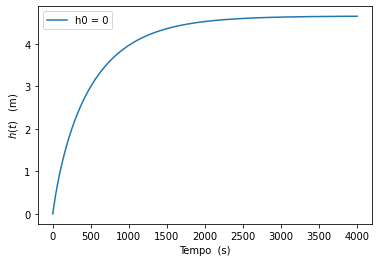

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#definindo a equação diferencial
def ode(y, t, R, r, Qe):
  h = y[0]
  g= 9.81 #m/s2
  pi = 3.14
  dhdt = Qe / (pi*R**2) - (r**2/R**2) * (2 * g * h)**(.5) 
  return dhdt





#Definindo o vetor tempo
t = np.linspace(0,4000,1000)

y = odeint(ode,h0,t,args=(R,r,Qe))


#Plotando a simulação

figure = plt.plot()
plt.plot(t,y[:,0])
plt.xlabel(r'Tempo  (s)', fontsize = 'medium')
plt.ylabel(r'$h(t)$   ($\mathrm{m}}$)', fontsize = 'medium')
plt.legend(["h0 = {}".format(h0)])
plt.show



## Verificando o efeito de diferentes **condições iniciais**

Informe a quantidade de condições iniciais a serem comparadas no mesmo gráfico: 5
<class 'int'>


<function matplotlib.pyplot.show(*args, **kw)>

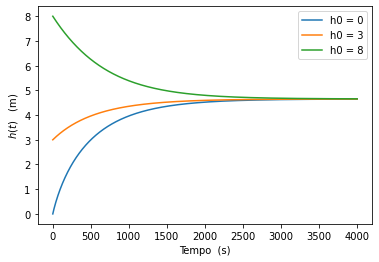

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


#definindo a equação diferencial
def ode(y, t):
  h = y[0]
  g= 9.81 #m/s2
  pi = 3.14

  #Definindo parâmetros
  R = 0.5 #Raio do tanque [m]
  r = 0.02 #raio do tubo de saída [m]
  Qe = 0.012 #Vazão Volumétrica [m3/s]

  dhdt = Qe / (pi*R**2) - (r**2/R**2) * (2 * g * h)**(.5) 
  return dhdt

#Definindo o vetor tempo
t = np.linspace(0,4000,1000)

#Condições Iniciais 
h0a = 0
h0b = 3
h0c = 8

ya = odeint(ode,h0a,t)
yb = odeint(ode,h0b,t)
yc = odeint(ode,h0c,t)

#Plotando a simulação

plt.plot(t,ya[:,0],t,yb[:,0],t,yc[:,0])
plt.xlabel(r'Tempo  (s)', fontsize = 'medium')
plt.ylabel(r'$h(t)$   ($\mathrm{m}}$)', fontsize = 'medium')
plt.legend(["h0 = {}".format(h0a), "h0 = {}".format(h0b), "h0 = {}".format(h0c)])
plt.show